In [61]:
df = pd.read_csv("../data/test/test.csv")
df.tail(1)

,Part_snap,Part_tag,Snapshot,recommend_item,tags,게시일,관련 브랜드,스타일,이름(나이),직업,촬영일,촬영지역,특집분류,related_items
299,299_0_part.png 299_1_part.png 299_2_part.png,재킷/카키/아우터/녹색&데님팬츠/하의/데님&부츠/블랙/신발/검정색,299_snap.png,299_0_reco.png 299_1_reco.png 299_2_reco.png 2...,남자 니트 재킷 데님팬츠 부츠,2019-02-26,349 / 0 / 0,워크/밀리터리,이영진 (24),학생,2019-02-26,홍대/신촌,NaN,299_0_part.png 299_1_part.png 299_2_part.png 2...


In [50]:
related_items = [] 

for x in df.Part_snap:
    related_items.append(str(x).split())

In [51]:
for i, recos in enumerate(df.recommend_item):
    res = recos.split("&")
    for r in res :
        related_items[i] += r.split()

In [62]:
related_items[:1]

[['0_0_part.png',
  '0_0_reco.png',
  '0_1_reco.png',
  '0_2_reco.png',
  '0_3_reco.png',
  '0_4_reco.png',
  '0_5_reco.png']]

In [54]:
df["related_items"] = [(" ").join(i) for i in related_items]
df.to_csv("../data/test/test.csv", index=False)

In [56]:
df = pd.read_csv("../data/test/test.csv")
type(df.related_items[1])

str

In [66]:
def splits(x):
    return x.split(" ")

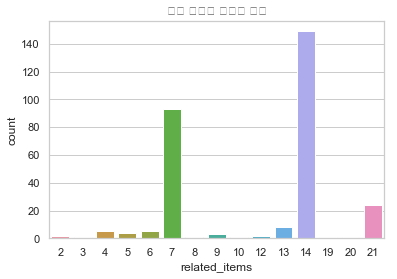

In [67]:
sns.countplot(df.related_items.apply(splits).apply(len))
plt.title("연관 아이템 갯수의 분포")
plt.show()

In [41]:
def mAP(results, k=13):
    
    truths = pd.read_csv("./data/test/test.csv").related_items
    
    aps = []
    
    for i, truth in enumerate(truths):
        
        if len(truth) < k:
            result = results[i][:len(truth)]
        else: 
            result = results[i][:k]
            truth = truth[:k]
        
        # AP 계산
        correct = 0
        precisions = [] 
        for i, (r, t) in enumerate(zip(result, truth)):
            if r == t:
                correct += 1
                precision = (correct) / (i + 1)
                precisions.append(precision)
                
            else : 
                continue
            
        aps.append(np.mean(precisions))   
        
    return np.mean(aps)     